In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("C:/Data Science/Unsupervised Learning/Country data segregation/Country-data.csv")

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [7]:
data.shape

(167, 10)

In [8]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
x=data.drop(['country'],axis=1).values

In [10]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(x)
    Wcss.append(kmeans.inertia_)
print(Wcss)

[117459687469.07817, 36528387934.3221, 21710210039.75414, 14610713446.535133, 10665874358.647743, 7655725089.094504, 5353767457.732321, 4260514816.1154003, 3249350807.2762313, 2709452471.10911]


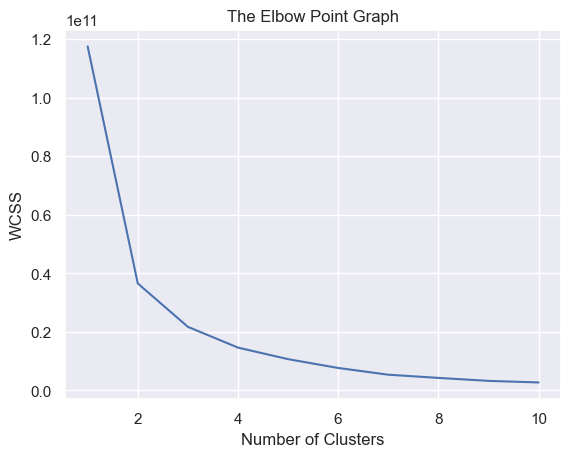

In [11]:
sns.set()
plt.plot(range(1,11),Wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# TRAINING THE MODEL

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=9)
y=kmeans.fit_predict(x)
y

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [13]:
data['Cluster']=y

In [14]:
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [15]:
import warnings
warnings.filterwarnings("ignore")

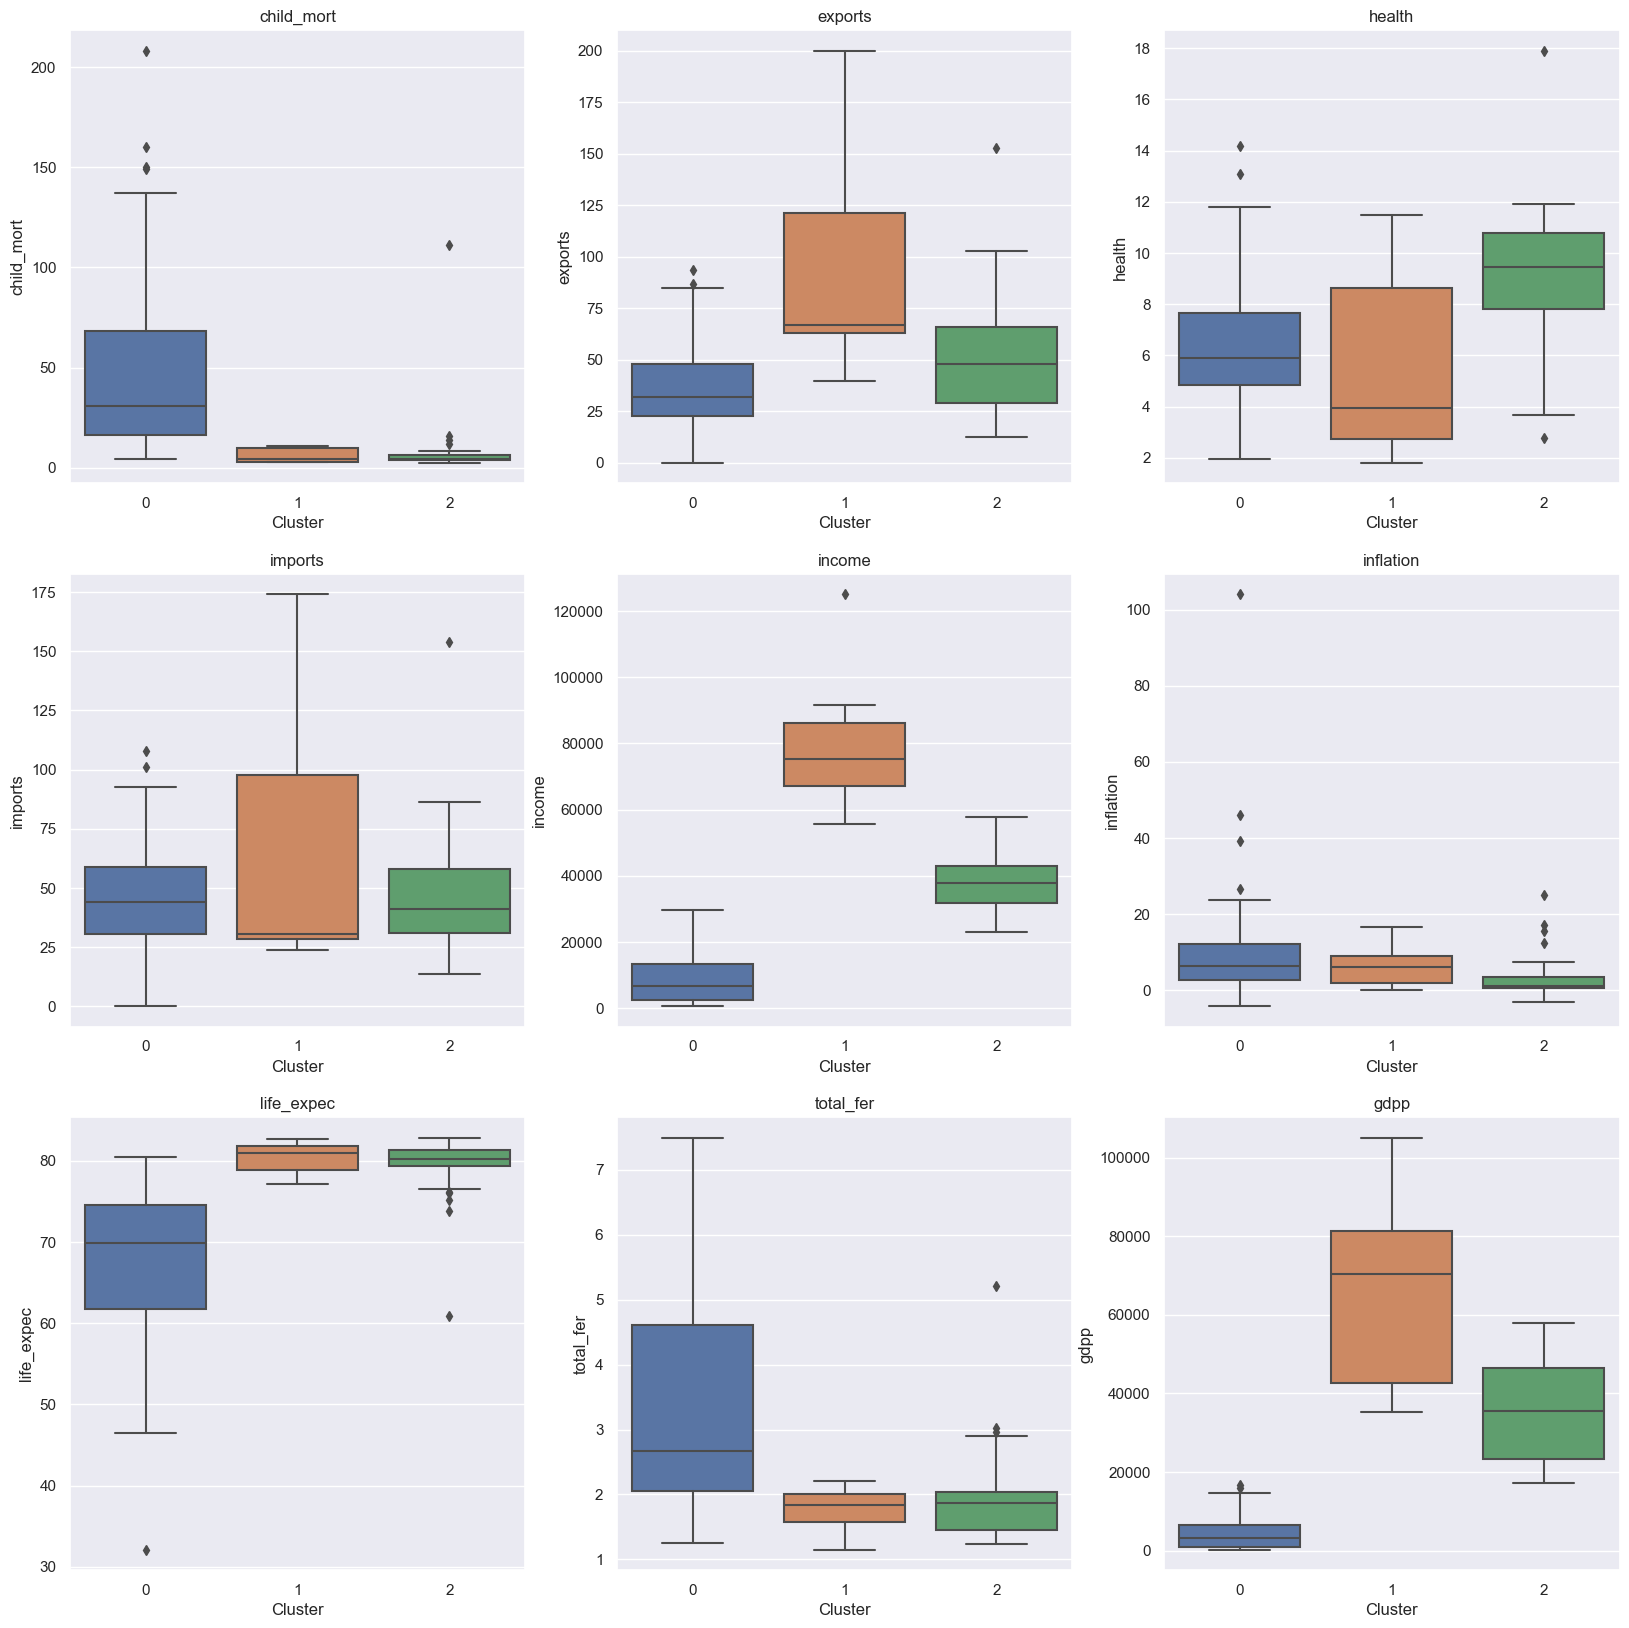

In [16]:
l=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=data,x=data.Cluster,y=data[l[i]])
    plt.title(l[i])

Here dataset is divided into 3 Clusters i.e Cluster 0, Cluster 1, Cluster 2

So below are the Observations from the above generated Graph:

1) In the very First Graph we can see that the child_mort is greater in Cluster 0 than compared with the Cluster 1 and 2.
   As the range is approx from 20 to 70.
   
2) In the Second Graph we observe that exports are less in Cluster 0 than  compared to the Cluster 1 and 2.

3) In the Third Graph we observed that the expenditure upon the health sector is low in comparison to the Cluster 1 and 2.

4) In the Fourth Graph we observe that the imports are very mch similar in case of Cluster 0 and 2.

5) In the Fifth Graph we observe that the income is less in Cluster 0 than  compared to the Cluster 1 and 2.

6) In the Sixth Graph we observe that the inflation is higher in Cluster 0 than  compared to the Cluster 1 and 2.

7) In the Seventh Graph we observe that the life_expec is less in Cluster 0.

8) In the Eighth Graph we observe that the total_fer is higher in Cluster 0 wihich indicates that the population is increasing rapidly.

9) In the Ninth Graph we observe that the GDPP is less in Cluster 0.

So from the above observations it is very clear that the HELP NGO's should focus more upon the countries which fall under Cluster 0.

In [17]:
count_0 = data[data['Cluster']==0]
count_1 = data[data['Cluster']==1]
count_2 = data[data['Cluster']==2]

In [18]:
count_0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [19]:
count_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,1
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,1
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1


In [20]:
count_2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,2
